<a href="https://colab.research.google.com/github/NathanaelGracedo/PCVK_2025/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## C.2 Global Threshold

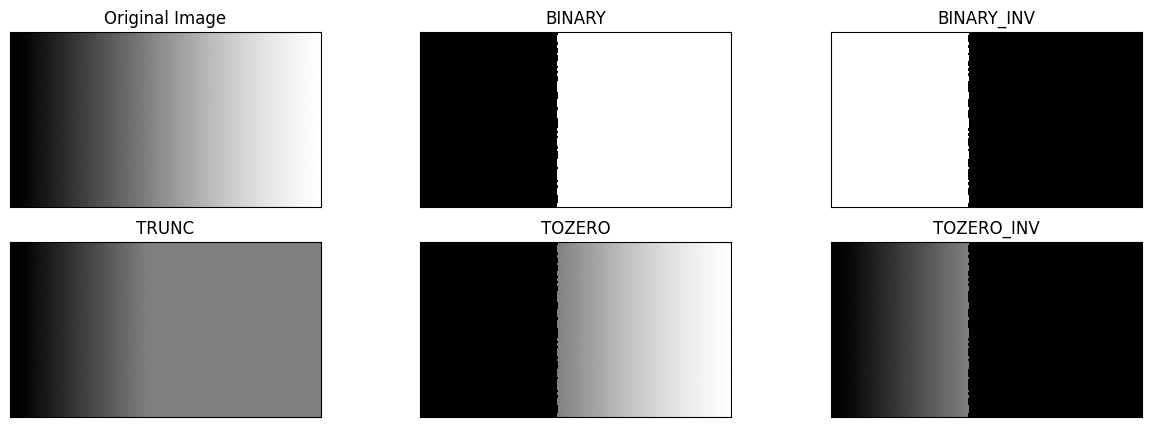

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

# Load the image
filename = '/content/drive/MyDrive/PCVK_img/gradient.jpg'
img = cv.imread(filename)

# Define the threshold value
thresh = 127

# Apply different thresholding methods
ret, thresh1 = cv.threshold(img, thresh, 255, cv.THRESH_BINARY)
ret, thresh2 = cv.threshold(img, thresh, 255, cv.THRESH_BINARY_INV)
ret, thresh3 = cv.threshold(img, thresh, 255, cv.THRESH_TRUNC)
ret, thresh4 = cv.threshold(img, thresh, 255, cv.THRESH_TOZERO)
ret, thresh5 = cv.threshold(img, thresh, 255, cv.THRESH_TOZERO_INV)

# Define titles and images for visualization
titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

# Visualize the results
plt.figure(figsize=(15, 5))
for i in range(len(images)):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], 'gray', interpolation='nearest')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

## C.3 Sudoku Threshold

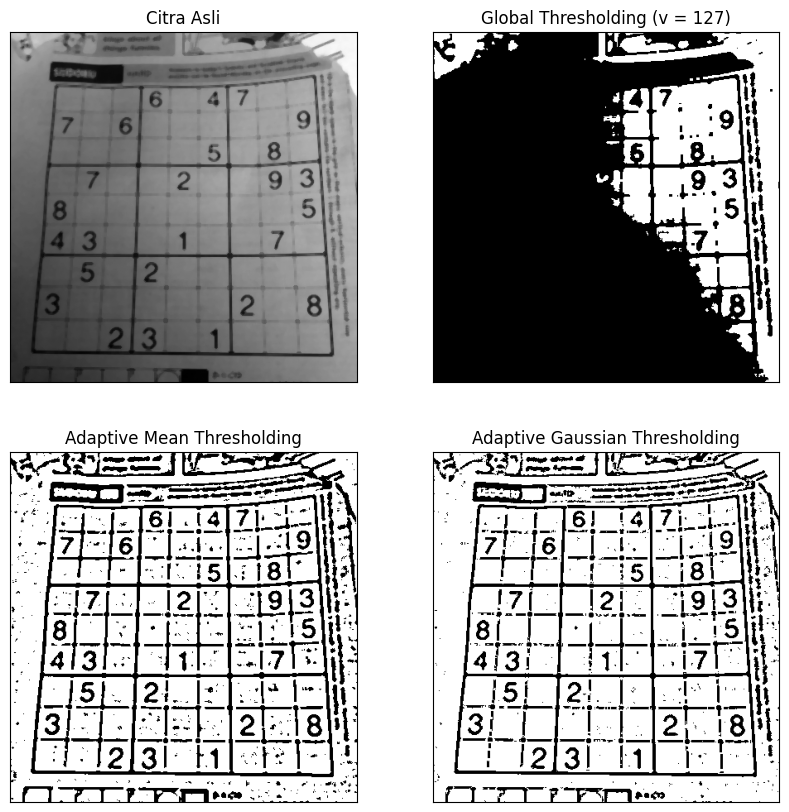

In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

filename = '/content/drive/MyDrive/PCVK_img/sudoku-original.jpg'
citra = cv.medianBlur(cv.imread(filename), 5)
gray = cv.cvtColor(citra, cv.COLOR_BGR2GRAY)
# gray = cv.medianBlur(gray,5)
thresh = 127
ret, th1 = cv.threshold(gray, thresh, 255, cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)
th3 = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)
titles = ['Citra Asli', 'Global Thresholding (v = 127)', 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
citra2 = [gray, th1, th2, th3]
plt.figure(figsize=(10, 10))
for i in range(len(citra2)):
    plt.subplot(2, 2, i + 1)
    plt.imshow(citra2[i], 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

## C.4 Otsu`s Threshold

/tmp/ipython-input-588552390.py:13: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.subplot(2, 2, 1), plt.hist(blur.ravel(), 256, [50, 200])


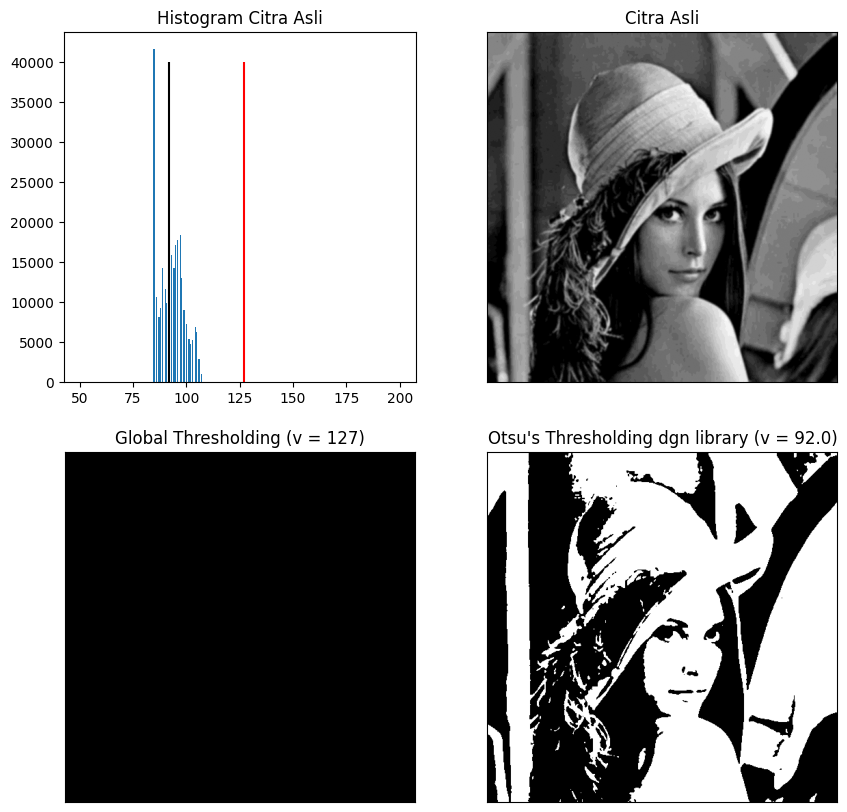

In [4]:
# Dengan Library
filename = ('/content/drive/MyDrive/PCVK_img/lena_gs_lc2.jpg')
img = cv.imread(filename, 0)
blur = cv.GaussianBlur(img, (5, 5), 0)
thresh = 127

ret, th1 = cv.threshold(blur, thresh, 255, cv.THRESH_BINARY)
ret2, th2 = cv.threshold(blur, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
x = ("Otsu's Thresholding dgn library (v = ") + str(ret2) + ")"
titles = ['Citra Asli', 'Global Thresholding (v = 127)', x]
citra3 = [blur, th1, th2]
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1), plt.hist(blur.ravel(), 256, [50, 200])
plt.vlines(ret, 0, 40000, colors='red')  # garis vertikal merah menunjuka n threshold global 127
plt.vlines(ret2, 0, 40000, colors='black')  # garis vertikal hitam menunjukk an threshold 92 hasil otsu's
plt.title('Histogram Citra Asli')
for i in range(len(citra3)):
    plt.subplot(2, 2, i + 2), plt.imshow(citra3[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

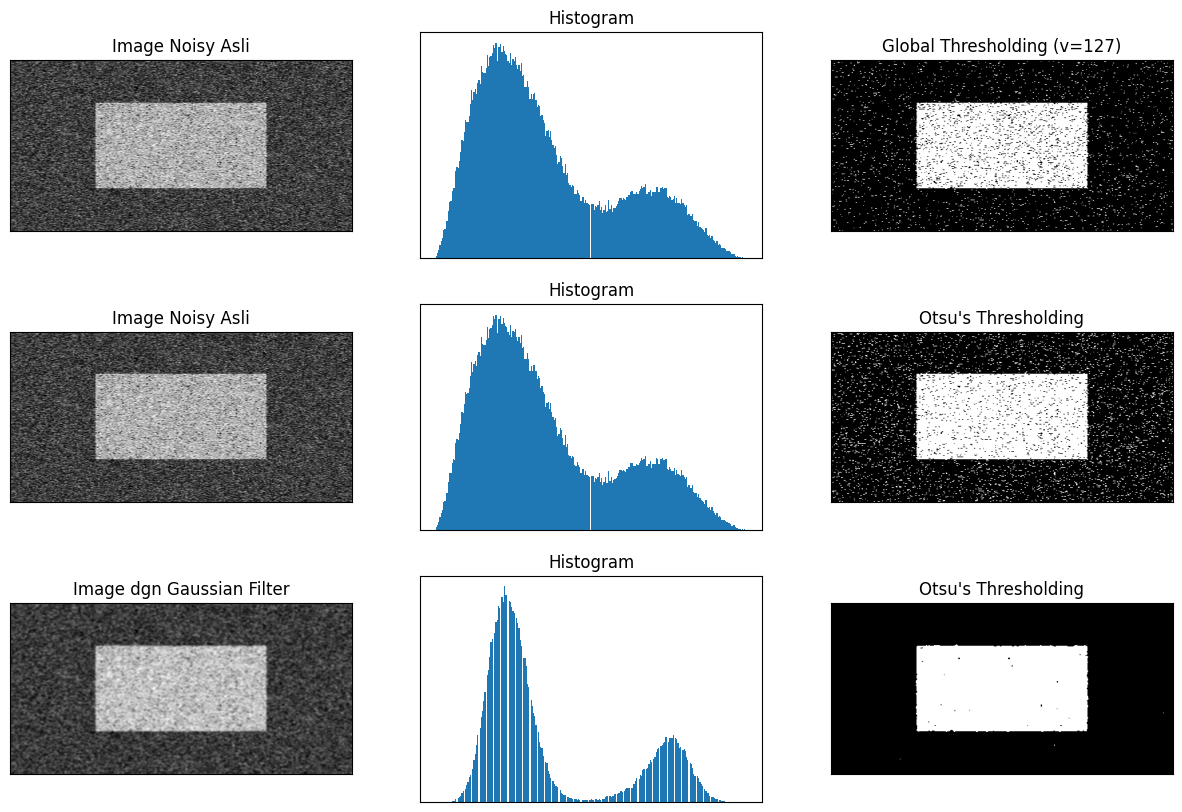

In [5]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

filename = ('/content/drive/MyDrive/PCVK_img/noisy2.png')
img = cv.imread(filename, 0)

if img is None:
    print(f"Error: Could not load image from {filename}")
else:
    # Global Thresholding
    ret1, th1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)

    # Otsu's thresholding
    ret2, th2 = cv.threshold(img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

    # Otsu's thresholding setelah dilakukan Gaussian filtering
    blur = cv.GaussianBlur(img, (5, 5), 0)
    ret3, th3 = cv.threshold(blur, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

    # plotting semua image
    images = [img, 0, th1,
              img, 0, th2,
              blur, 0, th3]
    titles = ['Image Noisy Asli', 'Histogram', 'Global Thresholding (v=127)', 'Image Noisy Asli', 'Histogram', "Otsu's Thresholding", 'Image dgn Gaussian Filter', 'Histogram', "Otsu's Thresholding"]

    plt.figure(figsize=(15, 10))
    for i in range(3):
        plt.subplot(3, 3, i * 3 + 1), plt.imshow(images[i * 3], 'gray')
        plt.title(titles[i * 3]), plt.xticks([]), plt.yticks([])
        plt.subplot(3, 3, i * 3 + 2), plt.hist(images[i * 3].ravel(), 256)
        plt.title(titles[i * 3 + 1]), plt.xticks([]), plt.yticks([])
        plt.subplot(3, 3, i * 3 + 3), plt.imshow(images[i * 3 + 2], 'gray')
        plt.title(titles[i * 3 + 2]), plt.xticks([]), plt.yticks([])
    plt.show()

## C.5 Sementasi Citra menggunakan K-Means

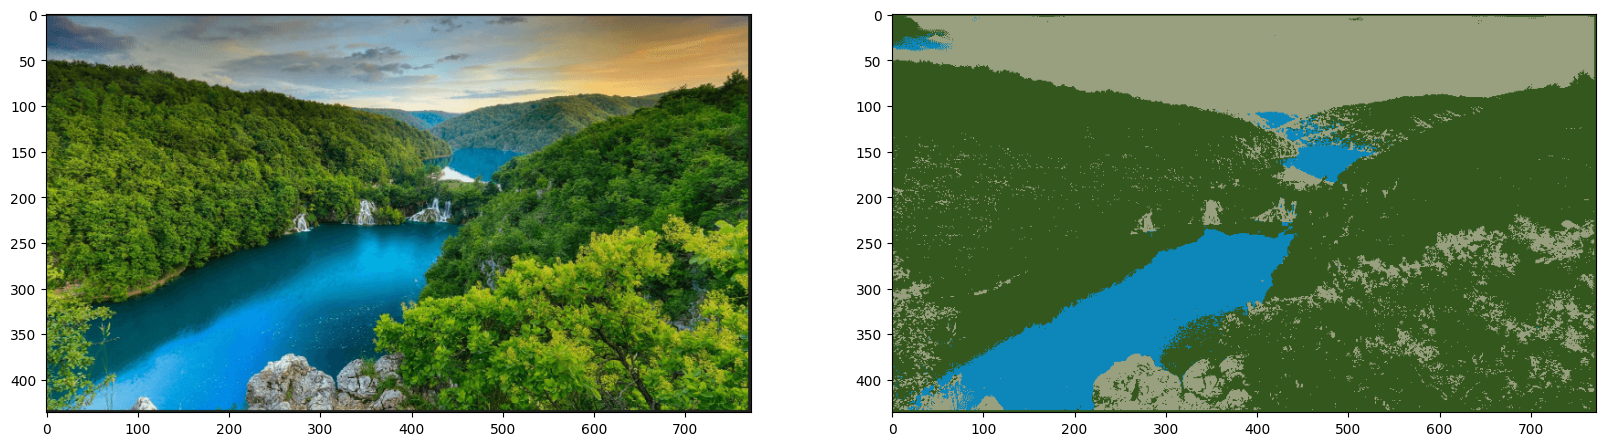

In [6]:
#KMeans Image Segmentation
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

filename = ('/content/drive/MyDrive/PCVK_img/jungle.png')
img = cv.imread(filename)

if img is None:
    print(f"Error: Could not load image from {filename}")
else:
    img = cv.cvtColor(img,cv.COLOR_BGR2RGB)

    '''
    kita akan menggunakan fungsi cv.kmeans() yang meminta array 2D sebagai masukan,
    sedangkan image aslinya adalah array 3D
    selanjutnya kita perlu melakukan flattening array image masukan
    '''
    #reshape array ke bentuk 2D
    pixel_values = img.reshape((-1, 3))

    # convert to float
    pixel_values = np.float32(pixel_values)

    '''
    syarat berhenti iterasi dr KMeans adalah jika centroid sudah tidak terlalu
    banyak pergeseran posisi antara interasi sekarang
    dengan iterasi sebelumnya (konvergen). Karena jumlah data yang besar, maka
    kita akan hentikan iterasi saat jumlah iterasi = 100
    atau epsilon(selisih antara posisi centroid skrg dgn posisi centroid di iterasi sebelumnya) < 0.2
    '''
    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)

    '''
    jika diperhatikan pada image asli, terdapat 3 warna utama (hijau, biru, dan
    putih/orange). untuk percobaan ini kita akan gunakan
    3 cluster untuk image ini
    '''
    k = 3
    _, labels, (centers) = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

    #konversi titik centroid kedalam integer
    centers = np.uint8(centers)

    #flattening label array
    labels = labels.flatten()

    #konversi warna pixel asli kewarna dari tiap centroidnya
    segmented_image = centers[labels.flatten()]

    # reshape ke bentuk image asli
    segmented_image = segmented_image.reshape(img.shape)

    plt.figure(figsize = (20,20))
    plt.subplot(1,2,1),plt.imshow(img)
    plt.subplot(1,2,2),plt.imshow(segmented_image)
    plt.show()

(<Axes: >, <matplotlib.image.AxesImage at 0x7e0ae1c7d5b0>)

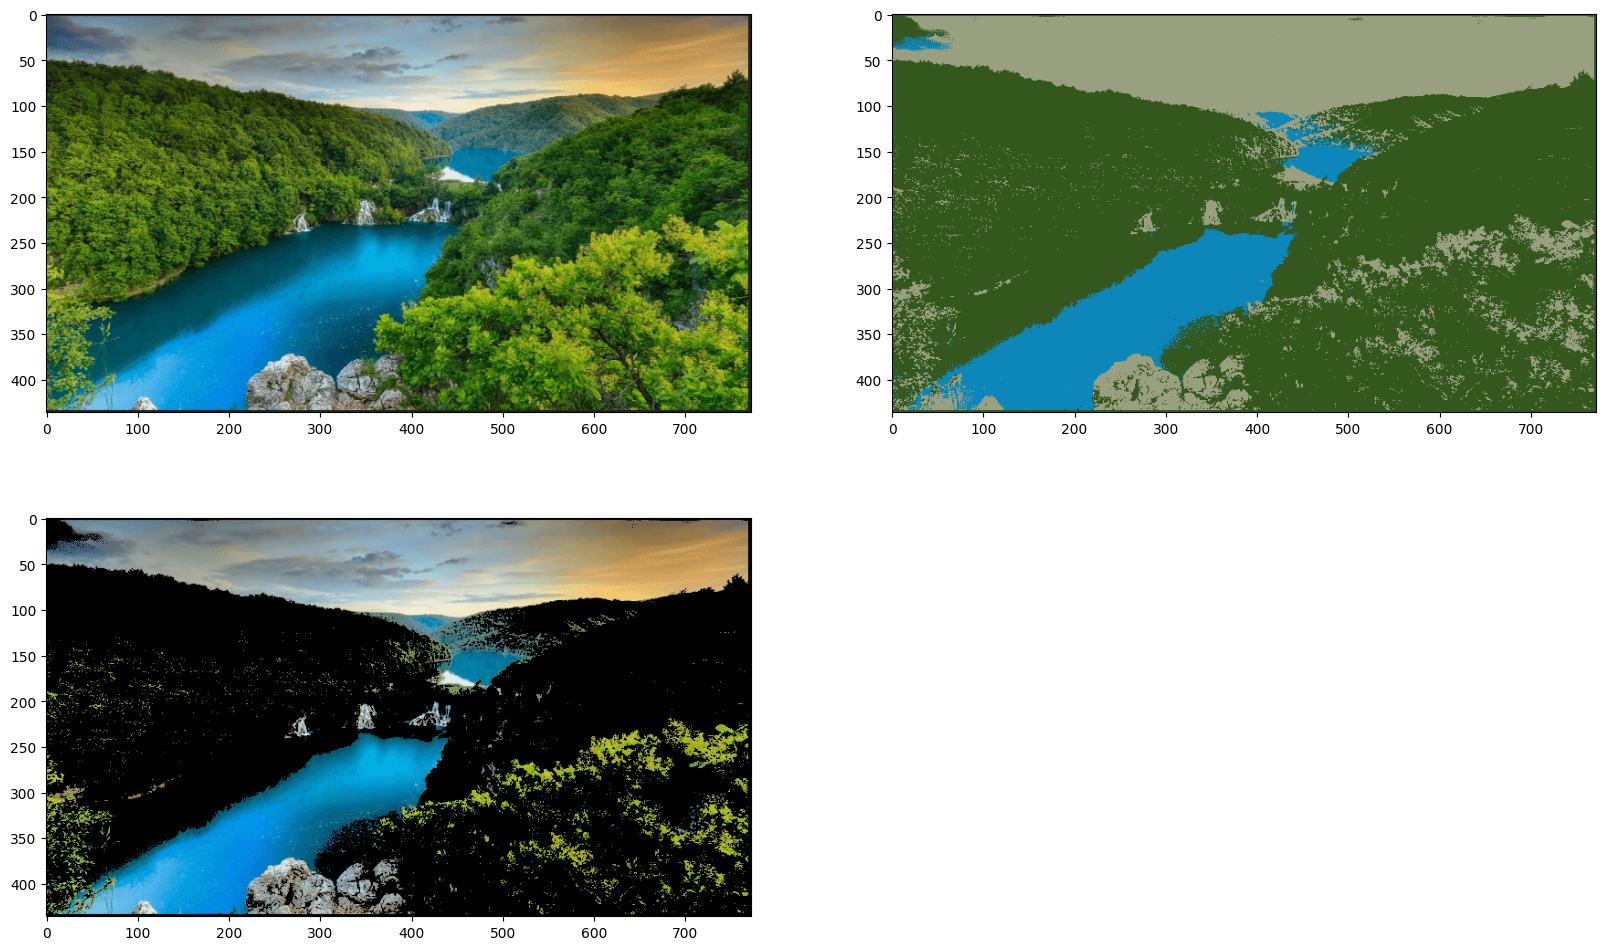

In [7]:
# ubah pixel di cluster 2 menjadi hitam
masked_image = np.copy(img)
# konvert ke bentuk vektor
masked_image = masked_image.reshape((-1, 3))
# cluster yang diubah
cluster = 2
masked_image[labels == cluster] = [0, 0, 0]
# konvert ke bentuk asli
masked_image = masked_image.reshape(img.shape)
plt.figure(figsize = (20,12))
plt.subplot(2,2,1),plt.imshow(img)
plt.subplot(2,2,2),plt.imshow(segmented_image)
plt.subplot(2,2,3),plt.imshow(masked_image)

# Tugas Praktikum

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## Global Treshold

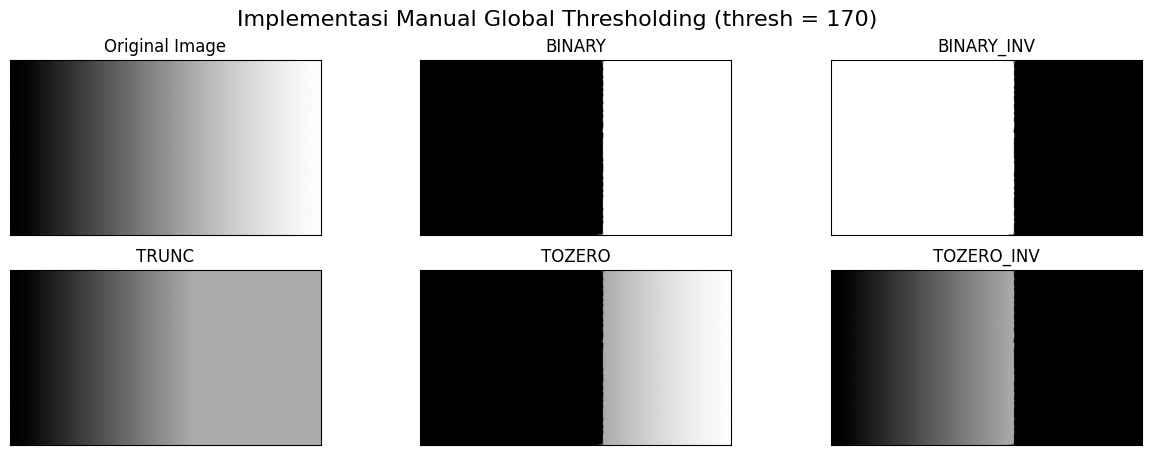

In [10]:
filename = ('/content/drive/MyDrive/PCVK_img/gradient.jpg')
img = cv2.imread(filename, 0)

thresh = 170
maxval = 255

# 1. BINARY
ret, thresh1_cv = cv2.threshold(img, thresh, maxval, cv2.THRESH_BINARY)
thresh1_manual = np.where(img > thresh, maxval, 0).astype(np.uint8)

# 2. BINARY_INV
ret, thresh2_cv = cv2.threshold(img, thresh, maxval, cv2.THRESH_BINARY_INV)
thresh2_manual = np.where(img > thresh, 0, maxval).astype(np.uint8)

# 3. TRUNC
ret, thresh3_cv = cv2.threshold(img, thresh, maxval, cv2.THRESH_TRUNC)
thresh3_manual = np.where(img > thresh, thresh, img).astype(np.uint8)

# 4. TOZERO
ret, thresh4_cv = cv2.threshold(img, thresh, maxval, cv2.THRESH_TOZERO)
thresh4_manual = np.where(img > thresh, img, 0).astype(np.uint8)

# 5. TOZERO_INV
ret, thresh5_cv = cv2.threshold(img, thresh, maxval, cv2.THRESH_TOZERO_INV)
thresh5_manual = np.where(img > thresh, 0, img).astype(np.uint8)

titles = ['Original Image', 'BINARY', 'BINARY_INV',
          'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1_manual, thresh2_manual,
          thresh3_manual, thresh4_manual, thresh5_manual]

plt.figure(figsize=(15, 5))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], 'gray', vmin=0, vmax=255)
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.suptitle(f'Implementasi Manual Global Thresholding (thresh = {thresh})', fontsize=16)
plt.show()

## Otsu Treshold

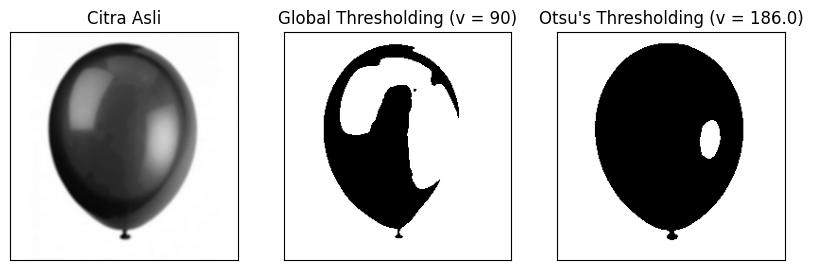

In [11]:
filename = ('/content/drive/MyDrive/PCVK_img/balon.jpg')
img = cv.imread(filename,0)
blur = cv.GaussianBlur(img,(5,5),0)
thresh = 90

ret,th1 = cv.threshold(blur,thresh,255,cv.THRESH_BINARY)
ret2,th2 = cv.threshold(blur,186,255,cv.THRESH_BINARY)

x = ("Otsu's Thresholding (v = ")+str(ret2)+")"
titles = ['Citra Asli', 'Global Thresholding (v = 90)', x]
citra3 = [blur, th1, th2]

plt.figure(figsize = (10,10))
for i in range(len(citra3)):
    plt.subplot(1,3,i+1),plt.imshow(citra3[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## Histogram dari Citra Tersegmentasi

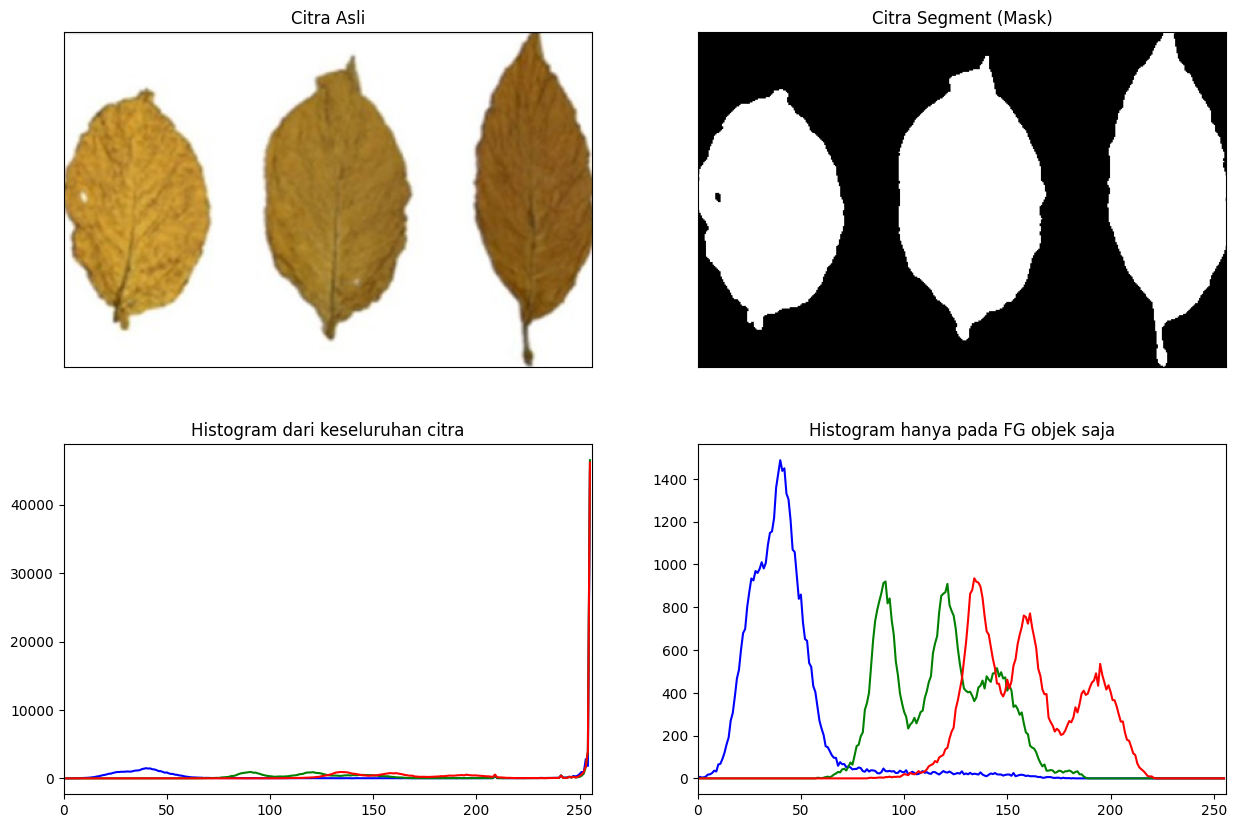

In [12]:

img_path = ('/content/drive/MyDrive/PCVK_img/leaf.jpg')
img = cv2.imread(img_path)
if img is None:
    raise FileNotFoundError(f"File not found at {img_path}")

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 1. Buat mask ("Citra Segment")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Menggunakan Otsu's thresholding.
ret, mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# 2. Hitung histogram
color = ('b', 'g', 'r')

# 2a. Histogram dari keseluruhan citra
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.imshow(img_rgb)
plt.title('Citra Asli')
plt.xticks([]), plt.yticks([])

plt.subplot(2, 2, 3)
for i, col in enumerate(color):
    hist_full = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist_full, color=col)
plt.title('Histogram dari keseluruhan citra')
plt.xlim([0, 256])

# 2b. Histogram hanya pada FG objek saja
plt.subplot(2, 2, 2)
plt.imshow(mask, 'gray')
plt.title('Citra Segment (Mask)')
plt.xticks([]), plt.yticks([])

plt.subplot(2, 2, 4)
for i, col in enumerate(color):
    hist_masked = cv2.calcHist([img], [i], mask, [256], [0, 256])
    plt.plot(hist_masked, color=col)
plt.title('Histogram hanya pada FG objek saja')
plt.xlim([0, 256])
plt.show()

## Segmentasi Warna

Cluster 0: [176 131  82]
Cluster 1: [143  42  18]
Cluster 2: [252 250 248]
Cluster 3: [250 206   4]


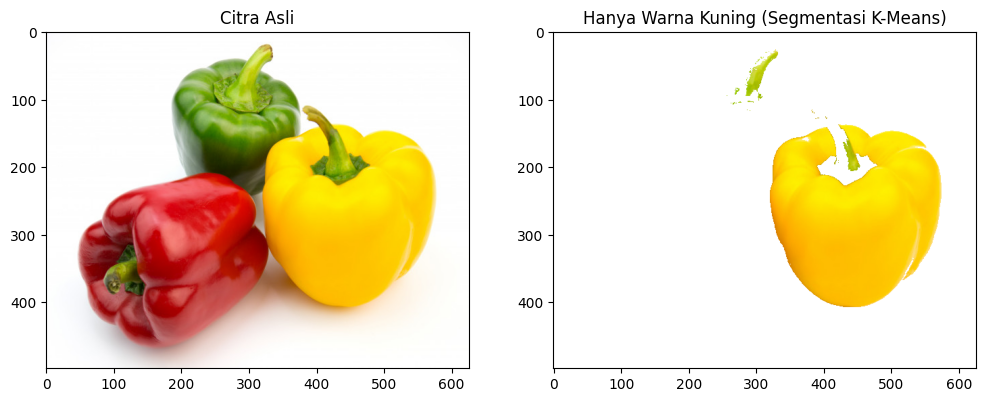

In [13]:

img_path = ('/content/drive/MyDrive/PCVK_img/peppers.jpg')
img = cv2.imread(img_path)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

pixel_values = img_rgb.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 4
compactness, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers)

yellow_cluster_index = -1
min_dist_to_yellow = float('inf')

ideal_yellow = np.array([255, 255, 0])

for i, center in enumerate(centers):
    print(f"Cluster {i}: {center}")
    dist = np.linalg.norm(center - ideal_yellow)
    if dist < min_dist_to_yellow:
        min_dist_to_yellow = dist
        yellow_cluster_index = i

masked_image = np.copy(img_rgb)
masked_image_2d = masked_image.reshape((-1, 3))
masked_image_2d[labels.flatten() != yellow_cluster_index] = [255, 255, 255]
masked_image = masked_image_2d.reshape(img_rgb.shape)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Citra Asli')

plt.subplot(1, 2, 2)
plt.imshow(masked_image)
plt.title('Hanya Warna Kuning (Segmentasi K-Means)')
plt.show()


## Treshholding Biner

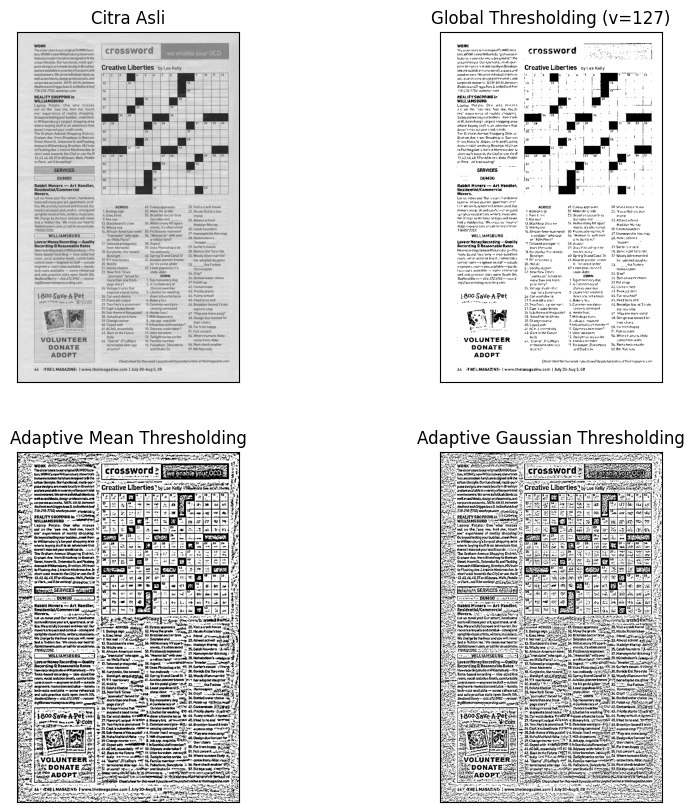

In [15]:
img_path = ('/content/drive/MyDrive/PCVK_img/crossword.jpg')
img = cv2.imread(img_path, 0)

# 1. Global Thresholding (v=127)
ret, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# 2. Adaptive Mean Thresholding
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# 3. Adaptive Gaussian Thresholding
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Plotting perbandingan
titles = ['Citra Asli', 'Global Thresholding (v=127)',
          'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

